# Исследование данных о компьютерных играх

В нашем распоряжении данные до 2016 года из открытых источников о компьютерных играх: объемы продаж, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Цель исследования** - изучить архив данных о компьютерных играх, чтобы выявить закономерности, определяющие успешность игры. На основе этих закономерностей предположить, какой продукт может быть потенциально популярным, и спланировать будущие рекламные кампании.
**Ход исследования** - перед тем, как начать выявлять закономерности и строить предположения о потенциальной популярности необходимо изучить данные, провести их предобработку (преобразование названий столбцов и типов данных, обработка пропусков, создание дополнительных столбцов). Таким образом, исследование будет состоять из трех этапов: 
- обзор данных
- предобработка данных
- проведение исследовательского анализа 

### Обзор данных

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('project_1.csv', sep=',')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


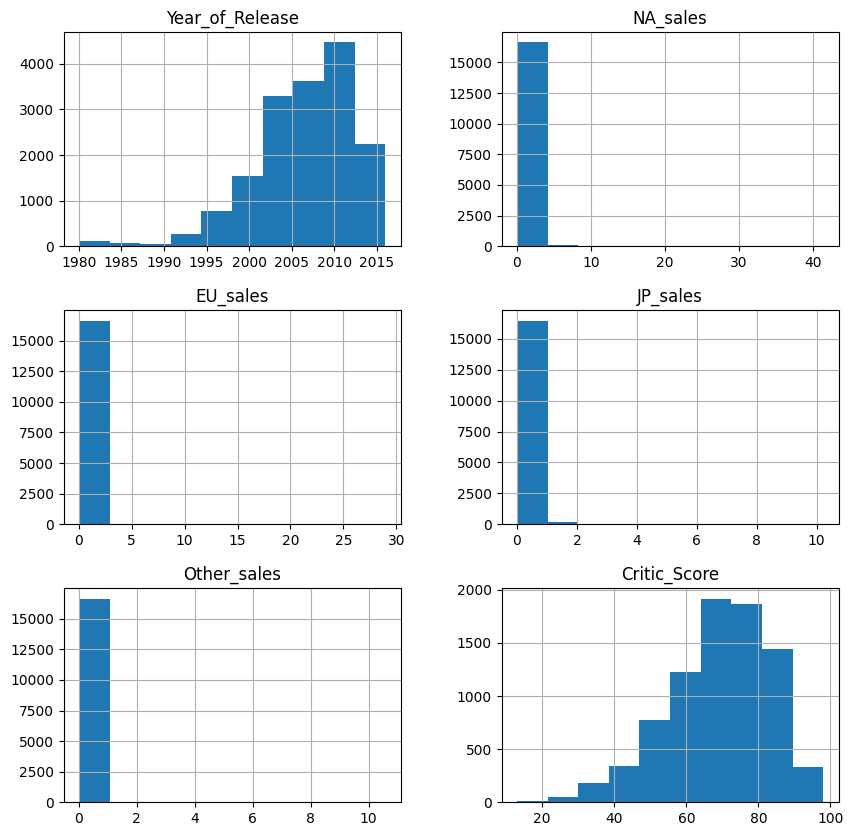

In [6]:
data.hist(figsize=(10,10));

**Вывод**: Датасет состоит из 16715 строк и 11 столбцов, в которых указана следующая информация о каждой игре: название, платформа, год выпуска, жанр, продажи в Северной Америке, Европе, Японии и других странах , оценка критиков, оценка пользователей, рейтинг от организации ESRB. В 6 столбцах есть пропуски, которые необходимо проанализировать. 

### Предобработка данных

#### Приведение к нижнему регистру названий столбцов

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Поиск явных дубликатов

In [8]:
data.duplicated().sum()

0

#### Поиск и изучение пропущенных значений 

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропущенными значениями в столбце "genre" лучше удалить, т.к. их всего лишь две, но добавление для них новой категории (например, "unknown") может отразиться на дальнейших исследованиях, связанных с данными в этом столбце. Пропуски в столбце name заменим на "unknown".

In [10]:
data = data.dropna(subset=['genre'])
data['name'] = data['name'].fillna('unknown')
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Посмотрим на количество пропусков в процентах в оставшихся столбцах.

In [11]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропуски в столбце "year_of_release" также можно удалить, т.к. их мало.

In [12]:
data = data.dropna(subset=['year_of_release'])

Пропуски в столбце "critic_score" заменим на значение-заглушку -1, чтобы все данные были одного типа.

In [13]:
data.loc[data['critic_score'].isna(),'critic_score'] = -1
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

С пропусками в стобце "user_score" поступим также - заменим на значение-заглушку (-1). Но сначала рассмотрим данные с аббревиатурой "tbd" в этом столбце. Эта аббревиатура означает, что игра ожидает определения рейтинга.

Посмотрим, в играх какого года выпуска есть такая аббревиатура.

In [14]:
data.loc[data['user_score']=='tbd', 'year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

Данные про игры, выпущенные до 2005 года, можно удалить, т.к. они являются устаревшими, и по ним нельзя предсказывать популярность в настоящее время. Для остальных игр вместо "tbd" укажем -1.

In [15]:
data = data.loc[~((data['user_score']=='tbd')&(data['year_of_release']<2005))]

In [16]:
data.loc[(data['user_score']=='tbd'), 'user_score'] = -1

Также поступим с оставшимися пропущенными значениями в столбце. 

In [17]:
data.loc[data['user_score'].isna(),'user_score'] = -1
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6671
dtype: int64

Пропуски в столбце "rating" заменим на "not specified".

In [18]:
data.loc[data['rating'].isna(), 'rating'] = 'not specified'
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразование типов данных

In [19]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Заменим тип данных в столбце "year_of_release" на int.

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')

Проверим, уникальные значения в столбцах "critic_score " и "user_score ".

In [21]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 48., 57., 29., 47., 65.,
       55., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 40.,
       46., 51., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заменим тип данных в столбце "critic_score" на int.

In [22]:
data['critic_score'] = data['critic_score'].astype('int')

In [23]:
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заменим тип данных в столбце "user_score" на float

In [24]:
data['user_score'] = data['user_score'].astype('float')

In [25]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int32
user_score         float64
rating              object
dtype: object

#### Добавление столбца с суммарными продажами во всех регионах 

In [26]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,not specified,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,not specified,31.38


**Вывод**: В ходе предобрадотки данных мы
- проверили данные на явные дубликаты;
- избавились от пропусков через удаление строк или замену значений на подходящие по смыслу;
- изменили типы данных в тех столбцах, где это было необходимо
- добавили столбец сумамрных продаж.

### Проведение исследовательского анализа данных

#### Определение актуального периода

Количество выпущенных в каждом году игр.

In [27]:
games_by_year = data.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


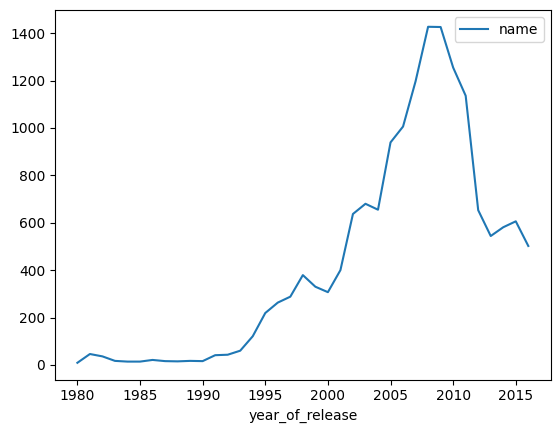

In [28]:
games_by_year.plot();

*Вывод*: Постепенный рост с 2000 по 2009 годы обусловлен развитием игровой индустрии. Спад в количестве выпускаемых игр, начавшийся в 2010 году, связан с экономическим кризисом и повышению требований к качеству выпускаемых игр. Т.к. эта ситуация актуальная и в настоящий момент, данные за более ранние периоды не так важны. 

Суммарные продажи по платформам

In [29]:
sales_by_platform = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
sales_by_platform = sales_by_platform.sort_values(by='total_sales', ascending=False)
sales_by_platform

,total_sales
platform,
PS2,1209.02
X360,961.24
PS3,931.34
Wii,891.18
DS,802.74
PS,714.26
PS4,314.14
PSP,289.50
GBA,271.34


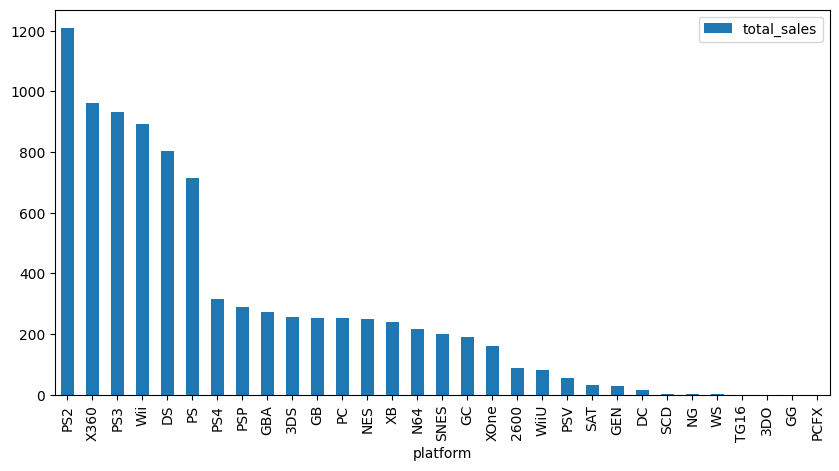

In [30]:
sales_by_platform.plot(kind='bar', figsize=(10,5));

ТОП-5 платформ с наибольшими суммарными продажами

In [31]:
sales_by_platform_index = sales_by_platform.index
platform_top_5 = sales_by_platform_index[0:5]
platform_top_5 = list(platform_top_5)
platform_top_5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Распределение продаж по годам по платформам, входящим в ТОП-5.

In [32]:
top_5 = data.query('platform in @platform_top_5')
sales_by_year_top_5 = top_5.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
sales_by_year_top_5

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,34.91,NaN,NaN,NaN
2001,NaN,159.77,NaN,NaN,NaN
2002,NaN,198.07,NaN,NaN,NaN
2003,NaN,180.71,NaN,NaN,NaN
2004,17.23,209.10,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


Из этой таблицы видно, что примерный срок "жизни" платформы составляет 10 лет.  

*Вывод*: для прогнозирования продаж на ближайшие несколько лет будем использовать данные за период с 2012 по 2015 год.

In [33]:
actual_data = data.loc[(data['year_of_release']>=2012)&(data['year_of_release']<=2015)]
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,not specified,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,not specified,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Выявим платформы-лидеры по продажам в актуальном периоде. 

In [34]:
actual_sales_by_platform = actual_data.pivot_table(index=['platform'], columns='year_of_release', values='total_sales', aggfunc='sum')
actual_sales_by_platform['total_sales'] = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
actual_sales_by_platform = actual_sales_by_platform.sort_values(by='total_sales', ascending=False)
actual_sales_by_platform

year_of_release,2012,2013,2014,2015,total_sales
platform,,,,,
PS3,107.36,113.25,47.76,16.82,285.19
PS4,NaN,25.99,100.00,118.90,244.89
X360,99.74,88.58,34.74,11.96,235.02
3DS,51.36,56.57,43.76,27.78,179.47
XOne,NaN,18.96,54.07,60.14,133.17
WiiU,17.56,21.65,22.03,16.35,77.59
PC,23.22,12.38,13.28,8.52,57.40
PSV,16.19,10.59,11.90,6.25,44.93
Wii,21.71,8.59,3.75,1.14,35.19


*Вывод*: несмотря на то что PS3 является лидирующей платформой, продажи по ней очень быстро падают, такая же ситуация X360 и 3DS, входящих в ТОП-5. Но в этом же топе есть платформы, чьи продажи растут, это PS4 и XOne. Их можно считать потенциально прибыльными платформами на ближайшие нескоколько лет. 

Построим для каждой платформы из ТОП-5 диаграмму размаха.

count    2384.000000
mean        0.552261
std         1.331045
min         0.010000
25%         0.040000
50%         0.150000
75%         0.490000
max        21.050000
Name: total_sales, dtype: float64

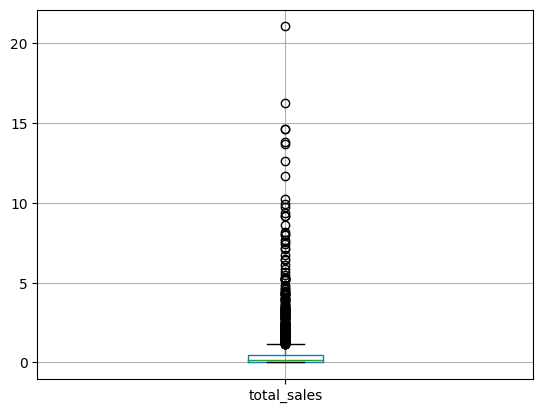

In [35]:
actual_data.boxplot(column='total_sales');
actual_data['total_sales'].describe()

count    455.000000
mean       0.626791
std        1.515258
min        0.010000
25%        0.050000
50%        0.230000
75%        0.660000
max       21.050000
Name: total_sales, dtype: float64

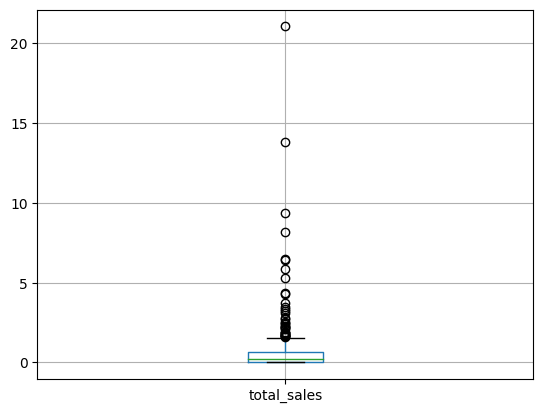

In [36]:
#Диаграмма размаха для PS3
actual_data.query('platform=="PS3"').boxplot(column='total_sales');
actual_data.query('platform=="PS3"')['total_sales'].describe()

(0.0, 1.55)

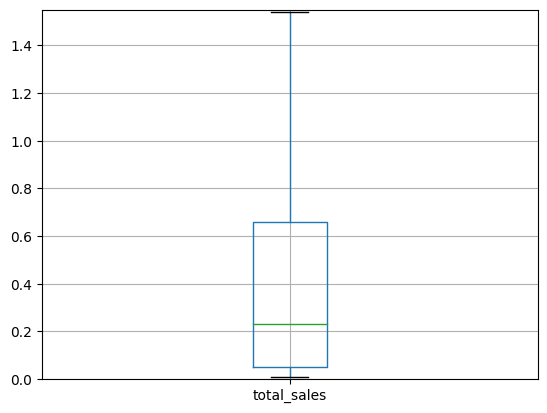

In [37]:
actual_data.query('platform=="PS3"').boxplot(column='total_sales');
plt.ylim(0,1.55)

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

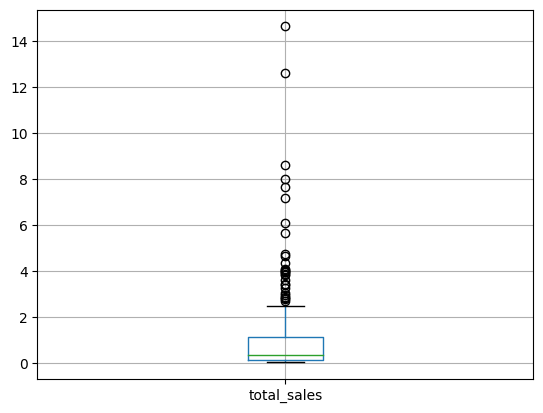

In [38]:
#Диаграмма размаха для PS4
actual_data.query('platform=="PS4"').boxplot(column='total_sales');
actual_data.query('platform=="PS4"')['total_sales'].describe()

(0.0, 2.7)

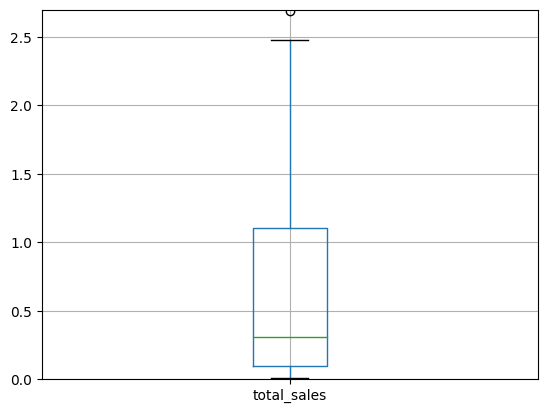

In [39]:
actual_data.query('platform=="PS4"').boxplot(column='total_sales');
plt.ylim(0, 2.7)

count    279.000000
mean       0.842366
std        1.744755
min        0.010000
25%        0.100000
50%        0.340000
75%        0.890000
max       16.270000
Name: total_sales, dtype: float64

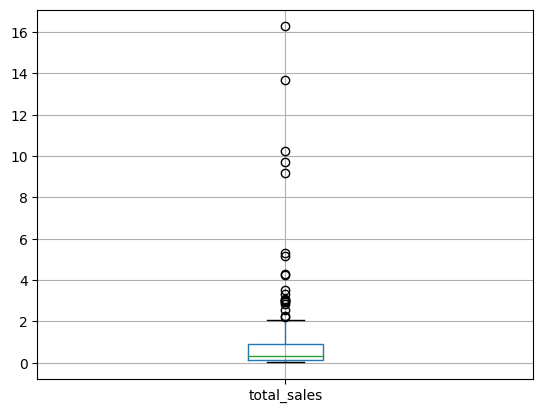

In [40]:
#Диаграмма размаха для X360
actual_data.query('platform=="X360"').boxplot(column='total_sales');
actual_data.query('platform=="X360"')['total_sales'].describe()

(0.0, 2.2)

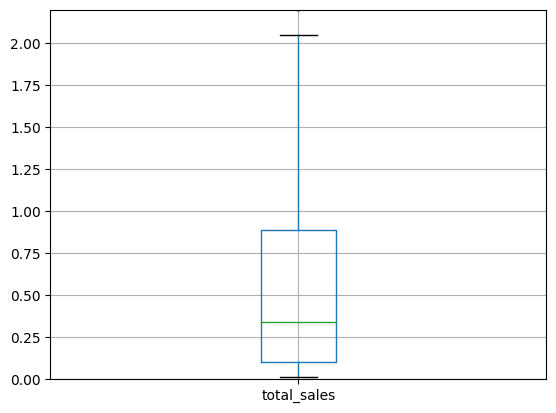

In [41]:
actual_data.query('platform=="X360"').boxplot(column='total_sales');
plt.ylim(0, 2.2)

count    350.000000
mean       0.512771
std        1.424582
min        0.010000
25%        0.050000
50%        0.115000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

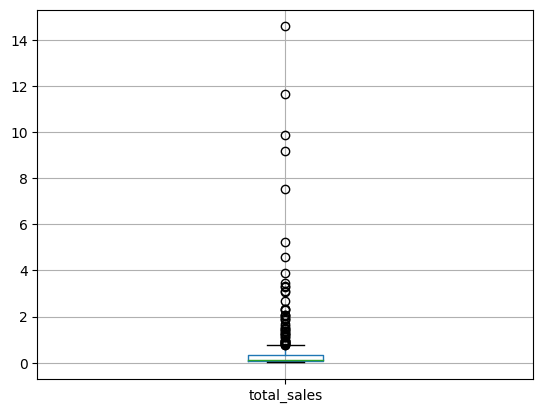

In [42]:
#Диаграмма размаха для 3DS
actual_data.query('platform=="3DS"').boxplot(column='total_sales');
actual_data.query('platform=="3DS"')['total_sales'].describe()

(0.0, 0.8)

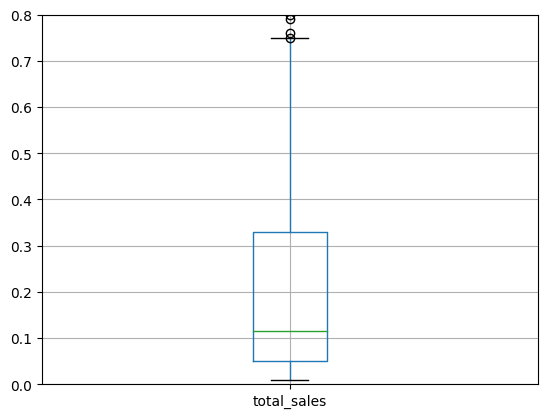

In [43]:
actual_data.query('platform=="3DS"').boxplot(column='total_sales');
plt.ylim(0, 0.8)

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64

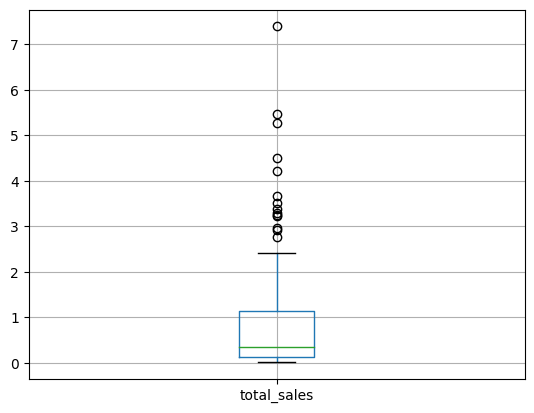

In [44]:
#Диаграмма размаха для XOne
actual_data.query('platform=="XOne"').boxplot(column='total_sales');
actual_data.query('platform=="XOne"')['total_sales'].describe()

(0.0, 2.5)

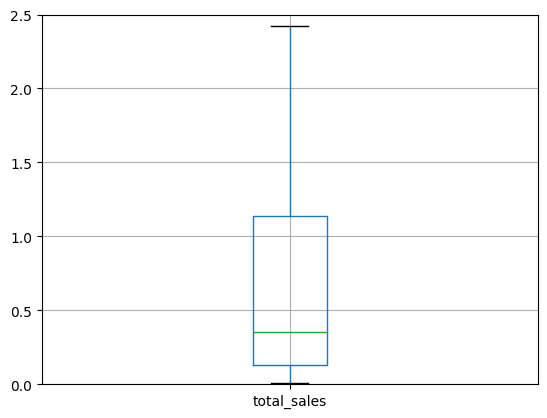

In [45]:
actual_data.query('platform=="XOne"').boxplot(column='total_sales');
plt.ylim(0, 2.5)

*Вывод*: Ограничив диаграммы размаха по оси y, заметим, что: 
- несмотря на то, что у PS3 максимальные суммарные продажи достигали 21 миллиона копий, почти все игры продавались в количестве до 1.5 миллиона копий с медианным значением чуть больше 0.2 миллиона;
- у PS4 почти все игры продавались в количестве до 2.5 миллиона копий с медианой 0.3 миллиона, при максимальном значении в 14.63 миллиона;
-  у X360 почти все игры продавались в количестве до 2.1 миллиона копий с медианой 0.34 миллиона, при максимальном значении в 16.27 миллиона;
-  у 3DS почти все игры продавались в количестве до 0.75 миллиона копий с медианой 0.115 миллиона, при максимальном значении в 14.6 миллиона;
- у XOne почти все игры продавались в количестве до 2.5 миллиона копий с медианой 0.35 миллиона, при максимальном значении в 7.39 миллиона.

Таким образом, платформа XOne имеет лучший показатель крайнего нормального значения и самую высокую медиану среди платформ из ТОП-5 по суммарным продажам, при том, что в этом рейтинге она занимает последнее место. Получаем, что для более точного определния наиболее прибыльных платформ необходимо учитывать не только суммарные продажи, но и распределение нормальных значений этих продаж.

 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для PS3.

,total_sales,critic_score,user_score
total_sales,1.000000,0.284434,0.204037
critic_score,0.284434,1.000000,0.761678
user_score,0.204037,0.761678,1.000000


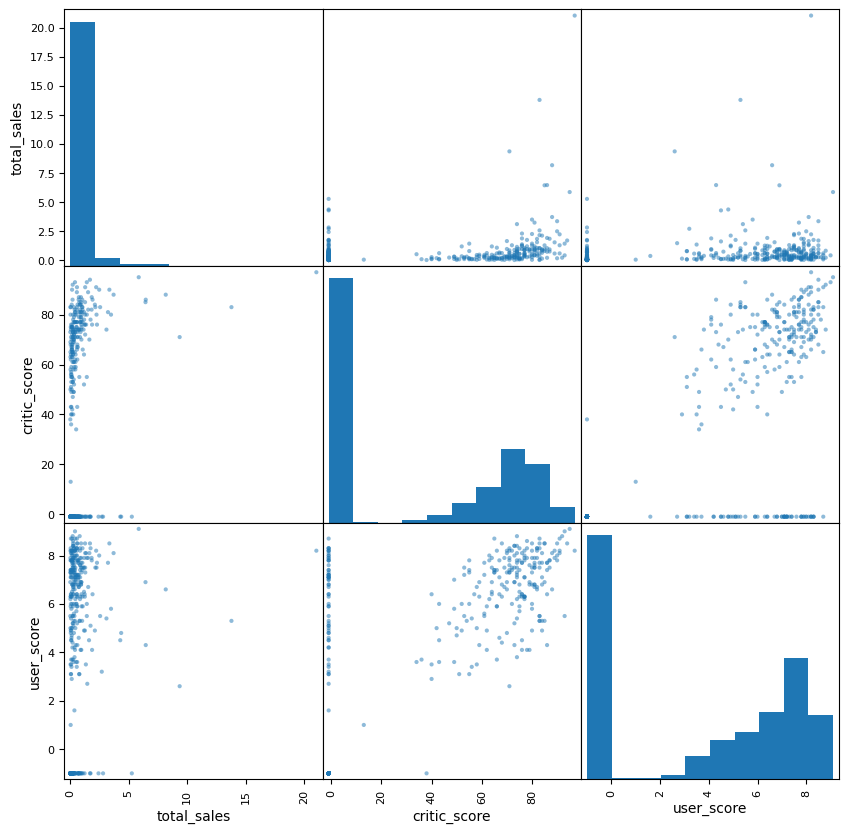

In [46]:
PS3 = actual_data.query('platform=="PS3"')
PS3 = PS3.loc[:,['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(PS3, figsize=(10,10));
PS3.corr()

*Вывод*: для платформы PS3 зависимость между суммарными продажами и отзывами игроков очень маленькая (примерно 0.04), между суммарными продажами и отзывами критиков зависимость более сильная, но не является хорошей (менее 0.5). 

Сделаем тоже самоя для оставшихся платформ из ТОП-5

,total_sales,critic_score,user_score
total_sales,1.000000,0.200948,0.098714
critic_score,0.200948,1.000000,0.933358
user_score,0.098714,0.933358,1.000000


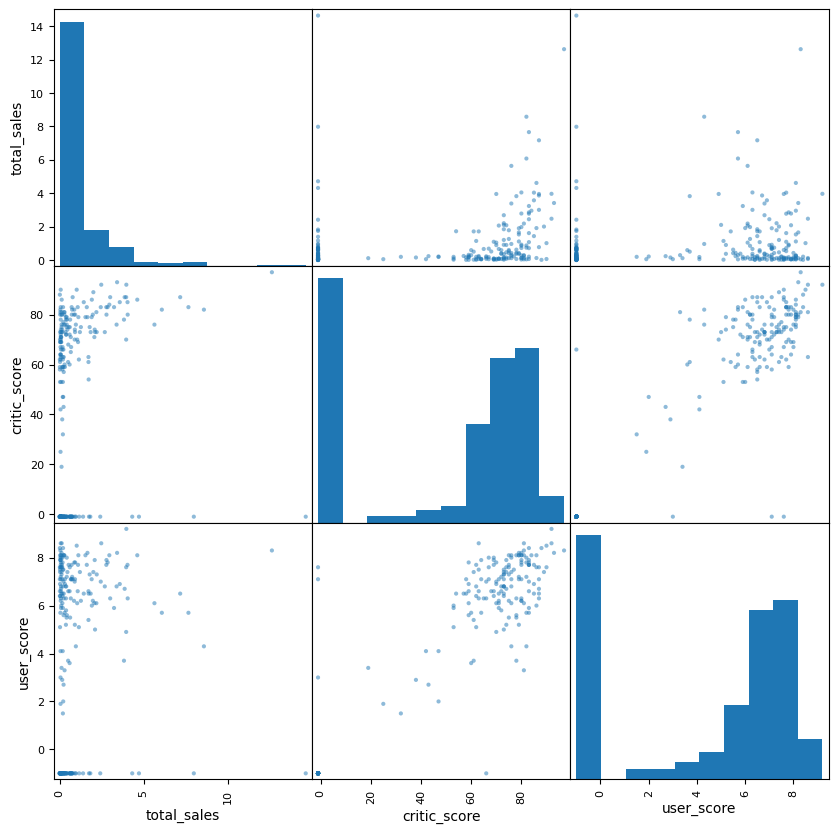

In [47]:
PS4 = actual_data.query('platform=="PS4"')
PS4 = PS4.loc[:,['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(PS4, figsize=(10,10));
PS4.corr()

*Вывод*: зависимость между суммарными продажами и отзывами пользователей для PS4 также незначительна, а между суммарными продажами и отзывами критиков выше чем для PS3, но все еще не является достаточно тесной. 

,total_sales,critic_score,user_score
total_sales,1.000000,0.24804,0.088062
critic_score,0.248040,1.00000,0.635500
user_score,0.088062,0.63550,1.000000


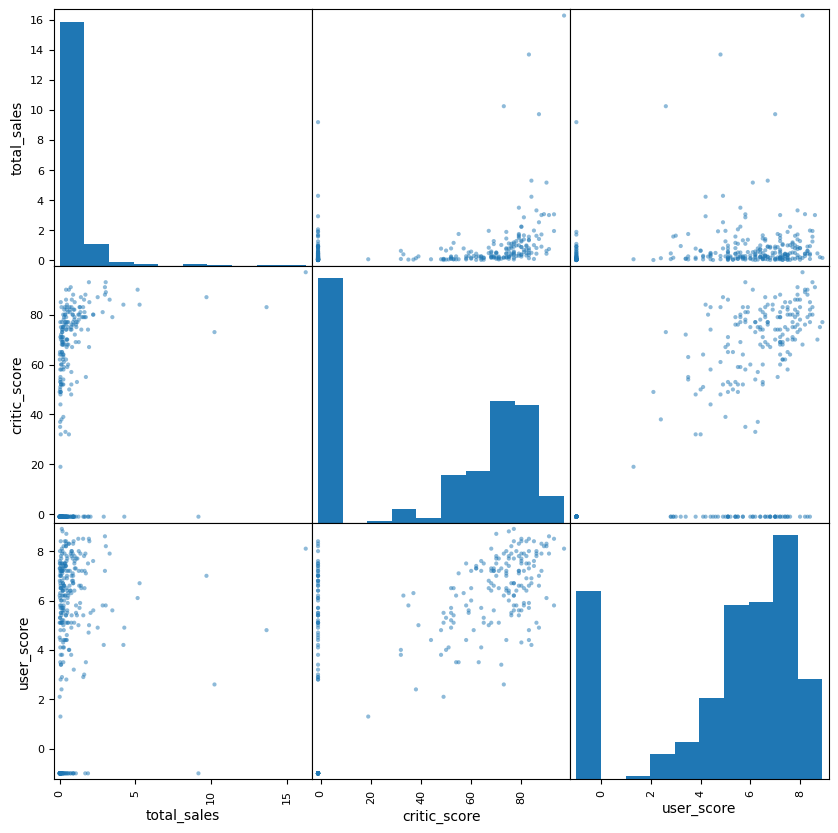

In [48]:
X360 = actual_data.query('platform=="X360"')
X360 = X360.loc[:,['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(X360, figsize=(10,10));
X360.corr()

*Вывод*: аналогично предыдущим двум платформам.

,total_sales,critic_score,user_score
total_sales,1.000000,0.167530,0.146958
critic_score,0.167530,1.000000,0.914489
user_score,0.146958,0.914489,1.000000


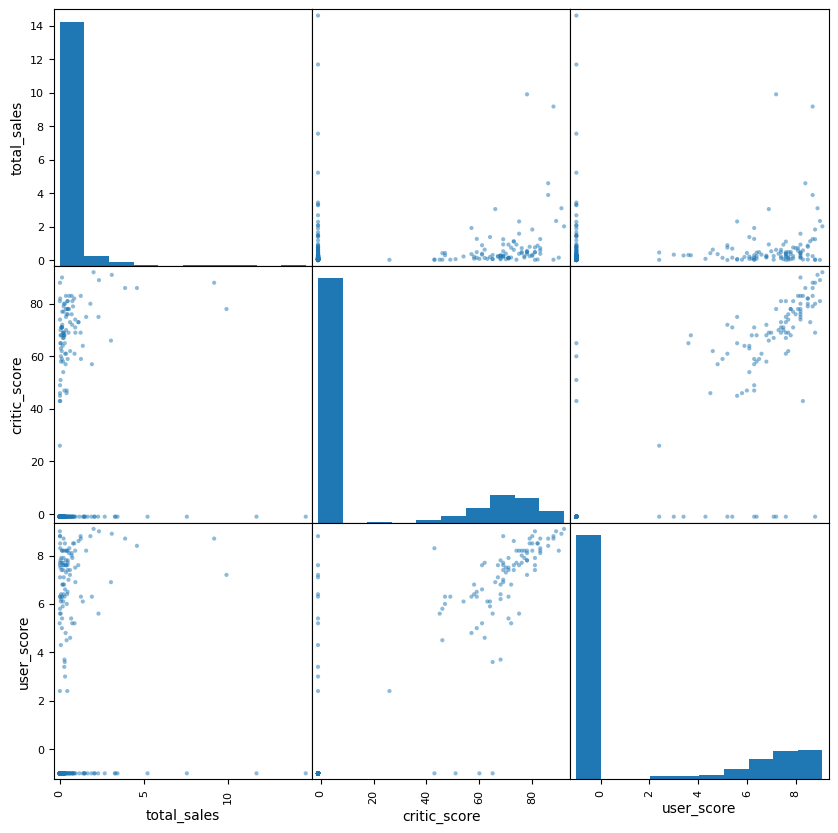

In [49]:
_3DS = actual_data.query('platform=="3DS"')
_3DS = _3DS.loc[:,['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(_3DS, figsize=(10,10));
_3DS.corr()

*Вывод*: для 3DS наблюдается более тесная зависимость между суммарными продажами и отзывами пользователям, чем у предыдущих платформ, но она все еще небольшая. Зависимость между суммарными продажами и отзывами критиками примерно в 2 раза ниже, чем у предыдущих платформ. 

,total_sales,critic_score,user_score
total_sales,1.000000,0.285002,0.146821
critic_score,0.285002,1.000000,0.816192
user_score,0.146821,0.816192,1.000000


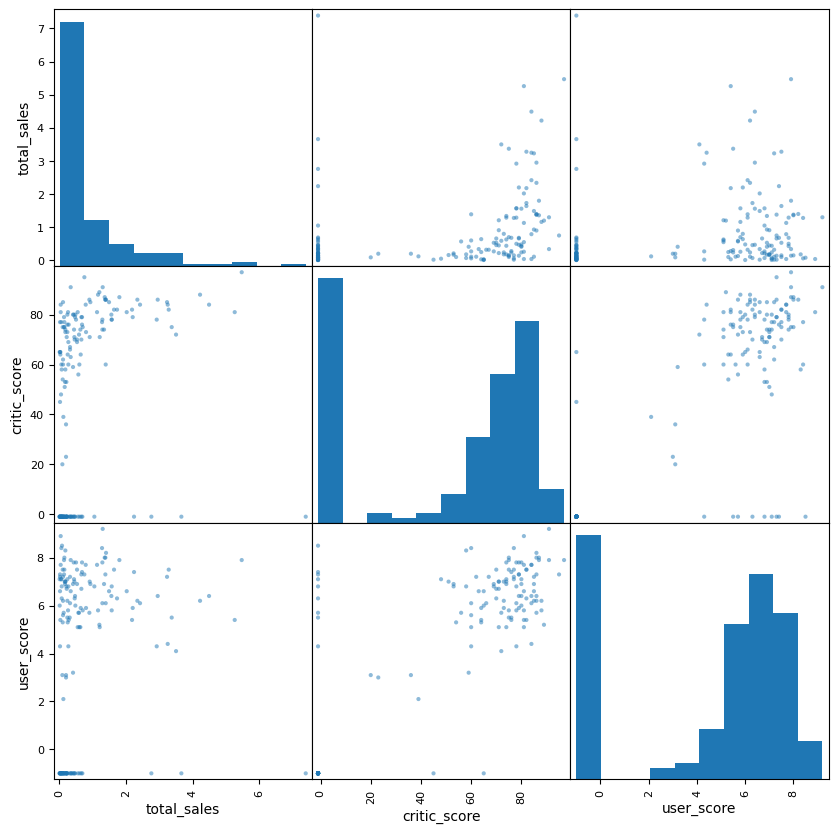

In [50]:
XOne = actual_data.query('platform=="XOne"')
XOne = XOne.loc[:,['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(XOne, figsize=(10,10));
XOne.corr()

*Вывод*: ситуация аналогична первым 3 платформам. 

*Вывод по корреляции*: для каждой платформы из ТОП-5 наблюдаются зависимости между суммарными продажами и отзывами пользвателей/критиков, но они не являются достаточно тесными (менее 0.5). Наиболее тесная зависимость между суммарными продажами и отзывами покупателей получена у 3DS, наиболее тесная зависимость между суммарными продажами и отзывами критиков у XOne.

Общее распределение игр по жанрам.

In [51]:
sales_by_genre = actual_data.pivot_table(index=['genre'], values='total_sales', aggfunc='median')
sales_by_genre['amount_of_games'] = actual_data.pivot_table(index=['genre'], values='name', aggfunc='count')
sales_by_genre = sales_by_genre.sort_values(by='total_sales', ascending=False)
sales_by_genre

,total_sales,amount_of_games
genre,,
Shooter,0.525,188
Sports,0.305,220
Platform,0.285,70
Racing,0.230,91
Misc,0.180,160
Fighting,0.160,93
Role-Playing,0.150,316
Simulation,0.150,62
Action,0.140,853


*Вывод*: По медианным продажам самыми популярными жанрами являются "Shooter", "Sports", "Platform", "Racing" и "Misc". Несмотря на то, что больше всего игр выпущено в жанре Action, медианное значение продаж здесь намного ниже, чем у жанров из ТОП-5, где игр в несколько раз меньше. 

**Вывод**: на основе данных по количеству выпущенных игр за каждый год и суммарных продаж на разных игровых платформах был определен актуальный период для дальнейших исследований  - 2012-2015 года. 
В этом периоде были определен ТОП-5 платформ по продажам, в него входят PS3, PS4, X360, 3DS и XOne. Несмотря на самое высокое значение суммарных продаж у PS3, лучшие крайнее нормальное значение и медиана определены у XOne. Для всех этих платформ наблюдаются зависимости между суммарными продажами и отзывами пользвателей/критиков, но они не являются достаточно тесными (менее 0.5).
Самыми популярными жанрами по медианным продажам в актуальном периоде являются "Shooter", "Sports", "Platform", "Racing" и "Misc".

#### Составление портрета пользователя каждого региона

Определим самые популярные (ТОП-5) платформы в каждом регионе - Северная Америка, Европа, Япония. 

In [52]:
#Северная Америка
platform_na = actual_data.pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
platform_na = platform_na.sort_values(by='na_sales', ascending=False)
platform_na

,na_sales
platform,
X360,139.36
PS3,102.71
PS4,87.25
XOne,78.85
3DS,51.17
WiiU,36.00
PC,17.76
Wii,17.39
PSV,10.83


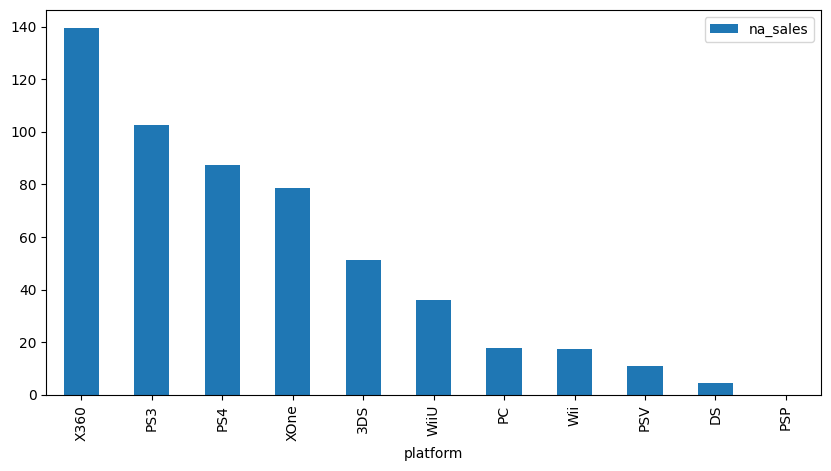

In [53]:
platform_na.plot(kind='bar', figsize=(10,5));

In [54]:
platform_na_index = platform_na.index
platform_na_top_5 = platform_na_index[0:5]
platform_na_top_5 = list(platform_na_top_5)
platform_na_top_5

['X360', 'PS3', 'PS4', 'XOne', '3DS']

In [55]:
#Европа
platform_eu = actual_data.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
platform_eu = platform_eu.sort_values(by='eu_sales', ascending=False)
platform_eu

,eu_sales
platform,
PS4,109.31
PS3,105.60
X360,73.81
XOne,41.96
3DS,40.31
PC,34.23
WiiU,23.65
Wii,11.81
PSV,10.97


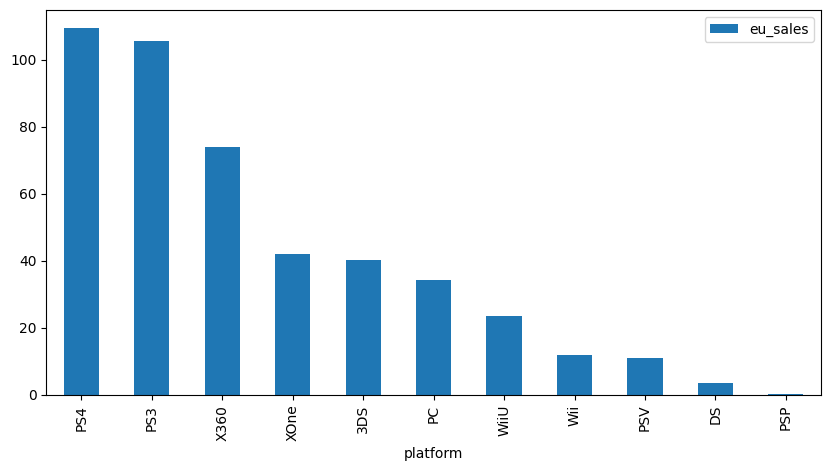

In [56]:
platform_eu.plot(kind='bar', figsize=(10,5));

In [57]:
platform_eu_index = platform_eu.index
platform_eu_top_5 = platform_eu_index[0:5]
platform_eu_top_5 = list(platform_eu_top_5)
platform_eu_top_5

['PS4', 'PS3', 'X360', 'XOne', '3DS']

In [58]:
#Япония
platform_jp = actual_data.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
platform_jp = platform_jp.sort_values(by='jp_sales', ascending=False)
platform_jp

,jp_sales
platform,
3DS,79.76
PS3,33.99
PSV,17.48
WiiU,12.34
PSP,10.47
PS4,10.22
DS,3.72
Wii,3.39
X360,1.57


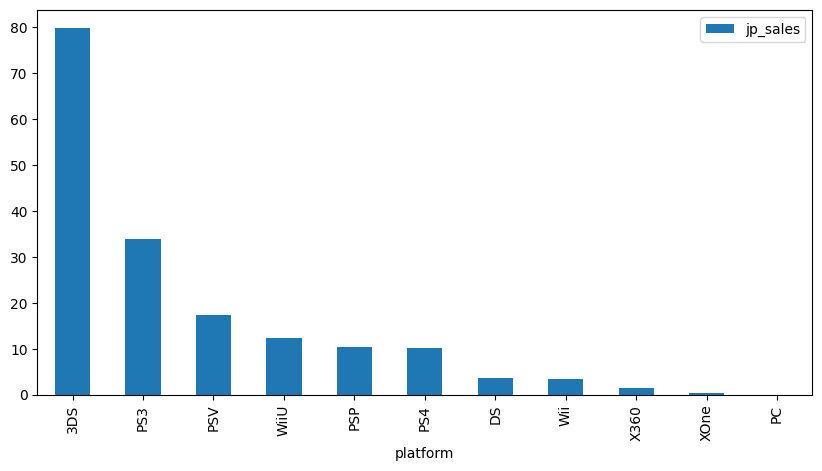

In [59]:
platform_jp.plot(kind='bar', figsize=(10,5));

In [60]:
platform_jp_index = platform_jp.index
platform_jp_top_5 = platform_jp_index[0:5]
platform_jp_top_5 = list(platform_jp_top_5)
platform_jp_top_5

['3DS', 'PS3', 'PSV', 'WiiU', 'PSP']

*Вывод*: В Северной Америке самыми популярными платформами являются X360, PS3, PS4, XOne, 3DS. В Европе - PS4, PS3, X360, XOne, 3DS. В Японии - 3DS, PS3, PSV, WiiU, PSP. 
Заметим, что в ТОП-5 Японии все платформы выпущены японскими компаниями. На рынке Северной Америки ТОП-5 состоит из платформ производства компаний США и Японии. А ТОП-5 Европы, где нет крупных собственных производителей, состоит из платформ двух регионов. 

Определим самые популярные жанры игр (ТОП-5) для каждого региона.  

In [61]:
#Северная Америка
genre_na = actual_data.pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
genre_na = genre_na.sort_values(by='na_sales', ascending=False)
genre_na

,na_sales
genre,
Action,168.55
Shooter,128.53
Sports,73.99
Role-Playing,58.11
Misc,37.43
Platform,24.09
Fighting,17.95
Racing,16.49
Adventure,7.97


In [62]:
genre_na_index = genre_na.index
genre_na_top_5 = genre_na_index[0:5]
genre_na_top_5 = list(genre_na_top_5)
genre_na_top_5

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [63]:
#Европа
genre_eu = actual_data.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
genre_eu = genre_eu.sort_values(by='eu_sales', ascending=False)
genre_eu

,eu_sales
genre,
Action,148.66
Shooter,97.57
Sports,57.08
Role-Playing,44.25
Misc,25.66
Racing,25.52
Platform,20.02
Simulation,13.28
Fighting,9.45


In [64]:
genre_eu_index = genre_eu.index
genre_eu_top_5 = genre_eu_index[0:5]
genre_eu_top_5 = list(genre_eu_top_5)
genre_eu_top_5

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [65]:
#Япония
genre_jp = actual_data.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
genre_jp = genre_jp.sort_values(by='jp_sales', ascending=False)
genre_jp

,jp_sales
genre,
Role-Playing,58.83
Action,45.73
Misc,11.82
Simulation,10.08
Fighting,8.69
Platform,8.52
Shooter,8.17
Sports,7.09
Adventure,7.06


In [66]:
genre_jp_index = genre_jp.index
genre_jp_top_5 = genre_jp_index[0:5]
genre_jp_top_5 = list(genre_jp_top_5)
genre_jp_top_5

['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']

*Вывод*: ТОП-5 популярных жанров в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc.
ТОП-5 популярных жанров в Европе - Action, Shooter, Sports, Role-Playing, Misc.
ТОп-5 популярных жанров в Японии - Role-Playing, Action, Misc, Simulation, Fighting.
В Северной Америке и Европе ТОп-5 жанров одинаков, в Японии же вместо Shooter и Sports популярны игры в жанрах Simulation и Fighting.

Определим продажи по категориям рейтинга ESRB для кажодого региона. 

In [67]:
#Северная Америка
rating_na = actual_data.pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
rating_na = rating_na.sort_values(by='na_sales', ascending=False)
rating_na

,na_sales
rating,
M,215.90
E,106.40
not specified,94.78
E10+,71.89
T,57.07


In [68]:
#Европа
rating_eu = actual_data.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
rating_eu = rating_eu.sort_values(by='eu_sales', ascending=False)
rating_eu

,eu_sales
rating,
M,177.42
E,99.42
not specified,84.03
E10+,51.56
T,43.17


In [69]:
#Япония
rating_jp = actual_data.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
rating_jp = rating_jp.sort_values(by='jp_sales', ascending=False)
rating_jp

,jp_sales
rating,
not specified,94.52
E,27.26
T,23.75
M,20.00
E10+,7.74


*Вывод*:в Северной Америке и Европе больше всего популярны игры с рейтингом M (Для взрослых). В Японии же больше популярны игры для детей и подростков. 

**Вывод**: Среднестатистический пользователь в Северной Америке - это человек старше 17 лет, выбирающий игры в жанре Action или Shooter. Чаще выбирает платформы американского производства (X360, XOne), но может отдать предпочтение платформам и японского производства (PS3, PS4, 3DS).
Среднестатистический пользователь в Европе - это человек старше 17 лет, выбирающий игры в жанре Action или Shooter. Больше предпочитает платформы японских производителей (PS4, PS3, 3DS), но и американские платформы (X360, XOne) также популярны. 
Среднестатистический пользователь в Японии - ребенок или подросток, выбирающий игры в жанре Role-Playing, Action, а такэе Simulation и Fighting. В качестве платформ выбирает японского производства (3DS, PS3, PSV, WiiU, PSP).

#### Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза H₀ - Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для проверки гипотез будем использовать метод ttest_ind, для вычесления t-критерия для средних значений двух независимых выборок. 

In [70]:
#Выборка для Xbox One
xbox_one = actual_data.query('platform=="XOne"')['user_score']
len(xbox_one)

160

In [71]:
#Выборка для PC
pc = actual_data.query('platform=="PC"')['user_score']
len(pc)

196

In [72]:
pc.unique()

array([ 4. ,  3.9,  7.9,  4.8,  4.2,  2.2,  6. ,  5.4, -1. ,  6.7,  5.5,
        8.2,  7.5,  6.2,  5.7,  5.9,  9.3,  8.5,  7.7,  6.5,  3. ,  8.3,
        4.7,  7.6,  4.5,  4.6,  6.6,  8. ,  6.9,  2.1,  3.3,  7. ,  7.3,
        5.6,  4.4,  8.6,  4.3,  7.4,  3.5,  7.1,  4.9,  8.1,  6.4,  7.8,
        8.4,  5.3,  8.9,  3.8,  8.7,  2.5,  5.8,  6.8,  3.6,  5.1,  3.4,
        1.4])

Так как объем выборок небольшой, зададим критический уровень статистической значимости alpha = 0.05.

In [73]:
alpha1 = 0.05

In [74]:
result1 = st.ttest_ind(xbox_one, pc)

In [75]:
print('p-значение:', result1.pvalue)

p-значение: 0.04821774683433214


In [76]:
if result1.pvalue < alpha1:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


*Вывод*: По результатам t-теста получаем, что средние пользовательские рейтинги платформ Xbox One и PC равны.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀ - Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза H₁ - Средние пользовательские рейтинги жанров Action и Sports не равны.

Для проверки гипотез будем использовать метод ttest_ind, для вычесления t-критерия для средних значений двух независимых выборок.

In [77]:
actual_data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [78]:
#Выборка для Action
action = actual_data.query('genre=="Action"')['user_score']
len(action)

853

In [79]:
#Выборка для Sports
sports = actual_data.query('genre=="Sports"')['user_score']
len(sports)

220

Так как объем выборок небольшой, зададим критический уровень статистической значимости alpha = 0.05.

In [80]:
alpha2 = 0.05

In [81]:
result2 = st.ttest_ind(action, sports)

In [82]:
print('p-значение:', result2.pvalue)

p-значение: 0.04067672901087169


In [83]:
if result2.pvalue < alpha1:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


*Вывод*: По результатам t-теста получаем, что средние пользовательские рейтинги жанров Action и Sports не равны.

**Вывод**: по результатам t-теста для независимых выборок обе гипотезы были подтверждены. 

**Вывод**: В результате проведения исследовательского анализа:
- был определен актуальный период для исследований (2012-2015 года);
- был определ ТОП-5 платформ по суммарным продажам за актуальный период (PS3, PS4, X360, 3DS и XOne);
- был определен низкий уровень зависимости между суммарными продажами платформ из ТОП-5 и отзывами пользователей/критиков (менее 0.5);
- был определен ТОП-5 популярных жанров в актуальном периоде (Action, Shooter, Role-Playing, Sports и Misc);
- были составлены портреты среднестатистических пользователей для Северной Америки, Европы и Японии;
- подтверждены две данные гипотезы. 

### Общий вывод

В ходе работы над проектом было сделано следующее:
1. Изучены датасет, дающий общую информацию о играх разных лет, состоящий из 16715 строк и 11 столбцов. 
2. Найдены и заполнены/удалены пропущенные значения в столбцах "name", "year_of_release", "genre", "critic_score", "user_score" и "rating".
3. Изменены типы данных в столбцах "year_of_release", "critic_score" и "user_score" для более удобной работы с ними.
4. Добавлен столбец "total_sales" с суммарными продажами по всем регионам.
5. Исходя из данных о суммарных продажах по платформам и распределению этих продаж по годам на платформах из ТОП-5 суммарных продаж (PS2, X360, PS3, Wii, DS), определен актуальный период для проведения исследований - с 2012 по 2015 год.
6. В актуальном периоде был определен ТОП-5 платформ по суммарным продажам - PS3, PS4, X360, 3DS, XOne. Среди них есть платформы как с падающими продажами (PS3, X360 и 3DS), так и с растущими (PS4 и XOne). В связи с этим, последние две платформы можно считать потенциально прибыльными на ближайшие несколько лет. Несмотря на самое высокое значение суммарных продаж у PS3, лучшие крайнее нормальное значение и медиана определены у XOne. Для всех этих платформ наблюдаются зависимости между суммарными продажами и отзывами пользвателей/критиков, но они не являются достаточно тесными (менее 0.5).
7. На основе данных о медианных продажах были выявлены самые популярные жанры - "Shooter", "Sports", "Platform", "Racing" и "Misc", хотя самое большое число игр выпущено в жанре  "Action" (9 место по медианным продажам). 
8. Составлены портреты пользователей для каждого региона, представленного в данных:
   - в Северной Америке это человек старше 17 лет, выбирающий игры в жанре Action или Shooter. Чаще выбирает платформы американского производства (X360, XOne), но может отдать предпочтение платформам и японского производства (PS3, PS4, 3DS);
   - в Европе это человек старше 17 лет, выбирающий игры в жанре Action или Shooter. Больше предпочитает платформы японских производителей (PS4, PS3, 3DS), но и американские платформы (X360, XOne) также популярны; 
   - в Японии это ребенок или подросток, выбирающий игры в жанре Role-Playing, Action, а такэе Simulation и Fighting. В качестве платформ выбирает японского производства (3DS, PS3, PSV, WiiU, PSP).
9. С помощью метода ttest_ind, для вычесления t-критерия для средних значений двух независимых выборо были подтверждены гипотезы о 
    - равенстве средних пользовательских рейтингов платформ Xbox One и PC 
    - неравенстве средних пользовательских рейтингов жанров Action и Sports.